# Experiment 6: PCA using Breast cancer Dataset
To implement the following for breast_cancer dataset
- Load data set
- Convert into Data frame
- Apply Scaler method
- Fit the Scaler Data into PCA
- Plot the visualization diagram for PCA



## Principal Component Analysis (PCA):
- It is an unsupervised technique for reducing the dimensionality of data.
- PCA helps in separating noise from the data and finding interesting insights or helpful patterns from the datasets.
- It can be used for:
    - exploratory data analysis in visualizing a large number of variables together,
    - remedying curse of dimensionality,
    - multi-collinearity in data,
    - and also visualizing outputs of most machine learning models with respect to input features.


## Import Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np, pandas as pd
data_info = load_breast_cancer(as_frame = True)
# loads dictionary with attributes like data, target, feature_names, target_names, etc
dataset = data_info.data
features = data_info.feature_names
target = data_info.target_names
print("features: ", features, "\n\n len of features: ", len(features), "\n\n target: ", target)
print("\n Type of Dataset: ", type(dataset))
print(len(dataset))


features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

 len of features:  30 

 target:  ['malignant' 'benign']

 Type of Dataset:  <class 'pandas.core.frame.DataFrame'>
569


## Scale the Data

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

    z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False,
and s is the standard deviation of the training samples or one if
with_std=False.

Centering and scaling happen independently on each feature by computing
the relevant statistics on the samples in the training set.

In [ ]:
from sklearn.preprocessing import StandardScaler
# with_mean - centers data before scaling.
# with_std - scale the data to unit Variance or std.
# copy - create a copy and not inplace.
scaler = StandardScaler(with_mean = True, with_std = True, copy = True)
scaler.fit(dataset)
scaled_data = pd.DataFrame(scaler.transform(dataset), columns = features)
print(scaled_data.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

## Perform PCA

In [ ]:
from sklearn.decomposition import PCA
''' Principal component analysis (PCA).:
Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.
'''
pca = PCA(n_components = 2)
pca.fit(scaled_data)
""" Trasformation:
Apply dimensionality reduction to X:
X is projected on the first principal components previously extracted
from a training set.
"""
x_pca = pca.transform(scaled_data)
print(x_pca)
print(len(x_pca))
print("Explained Variance Ratio: ", pca.explained_variance_ratio_)

[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]
569
Explained Variance Ratio:  [0.44272026 0.18971182]


### Generate Graph

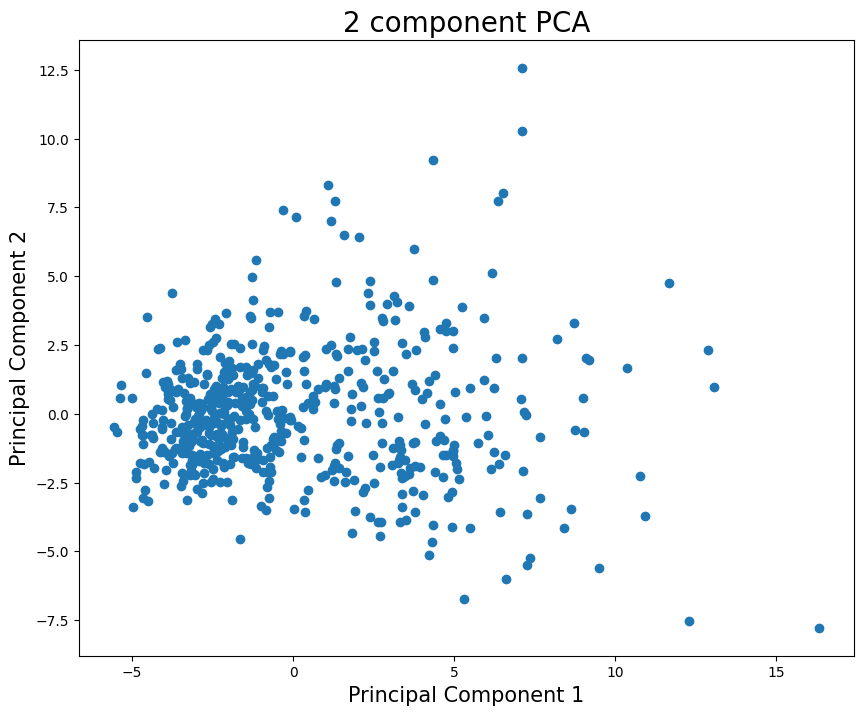

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)
plt.scatter(x_pca[:,0], x_pca[:,1])